In [91]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

In [92]:
# Parameters
weight = 0.7
bias = 0.3

In [93]:
# Synthetic Data with Gaussian Noise
X = np.random.rand(400, 1)
y = weight * X + bias + np.random.randn(400, 1) * 0.1

In [94]:
# Convert to PyTorch tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()

In [95]:
# Splitting data into training and testing sets
train_split = int(0.8 * len(X_tensor))
X_train, y_train = X_tensor[:train_split], y_tensor[:train_split]
X_test, y_test = X_tensor[train_split:], y_tensor[train_split:]

print('Train samples:', len(X_train))
print('Test samples :', len(X_test))

Train samples: 320
Test samples : 80


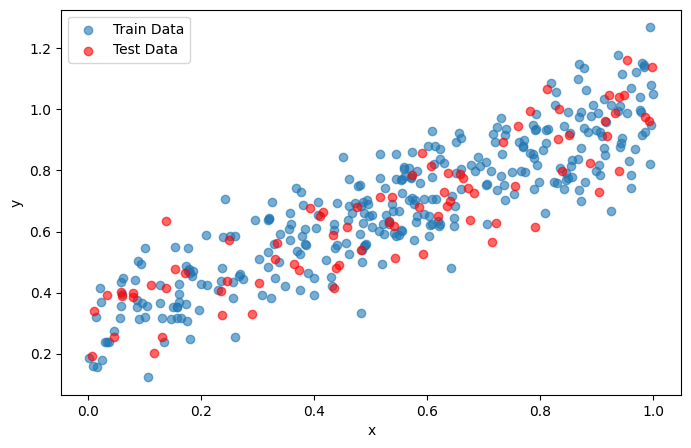

In [96]:
# Visualize Data (train and test)
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, alpha=0.6, label="Train Data")
plt.scatter(X_test, y_test, c="red", alpha=0.6, label="Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [97]:
# Building a Linear Regression Model Class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [98]:
# Create an instance of the model
lin_reg_model_0 = LinearRegressionModel()
lin_reg_model_0.state_dict()

OrderedDict([('weights', tensor([1.1103])),
             ('bias', tensor([-1.6898], dtype=torch.float64))])

In [99]:
with torch.inference_mode():
    y_preds = lin_reg_model_0(X_test)

y_preds[:5], y_test[:5]

(tensor([[-0.5814],
         [-1.0172],
         [-1.0925],
         [-1.1541],
         [-1.2767]], dtype=torch.float64),
 tensor([[1.1373],
         [0.8160],
         [0.7123],
         [0.5410],
         [0.4739]]))

In [100]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=lin_reg_model_0.parameters(), lr=0.01)

In [103]:
epochs = 201

# number of epochs to pass the data through the model
for epoch in range(epochs):
    # put the model in training mode
    lin_reg_model_0.train()

    # make y predictions based on current parameters
    y_pred = lin_reg_model_0(X_train)

    # calculate the loss
    loss = loss_fn(y_pred, y_train)

    # zero the gradients of the optimzer (they accumulate by default)
    optimizer.zero_grad()

    # perform backpropagation on the loss
    loss.backward()

    # progress/step the optimizer (gradient descent)
    optimizer.step()

    lin_reg_model_0.eval()

    # print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(
            f"Epoch: {epoch} | Loss: {loss.item():.4f} | Weights: {lin_reg_model_0.weights.item():.4f} | Bias: {lin_reg_model_0.bias.item():.4f}"
        )

Epoch: 0 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 10 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 20 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 30 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 40 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 50 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 60 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 70 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 80 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 90 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 100 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 110 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 120 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 130 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 140 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 150 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 160 | Loss: 0.0855 | Weights: 0.7424 | Bias: 0.2775
Epoch: 1

In [105]:
from pathlib import Path
MODEL_PATH = Path("/Users/anish_1/Documents/Python-Coding-Practice/AI_ML/PyTorch Course/models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(lin_reg_model_0.state_dict(), MODEL_SAVE_PATH)


Saving model to: /Users/anish_1/Documents/Python-Coding-Practice/AI_ML/PyTorch Course/models/01_pytorch_workflow_model_0.pth
